In [69]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [70]:
dfx = pd.read_csv('dataset/logisticX.csv')
dfy = pd.read_csv('dataset/logisticY.csv')

x = dfx.values
y = dfy.values

(99, 2)
(99, 1)


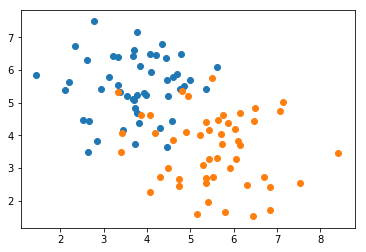

In [71]:
# Data Visualise

print(x.shape)
print(y.shape)
a = x
plt.scatter(a[:49,0],a[:49,1],label = 'Class 0')
plt.scatter(a[49:,0],a[49:,1],label = 'Class 1')


In [72]:
# Create Training and Test Set
x = np.append(np.ones((99,1)),x,axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(79, 3)
(20, 3)
(79, 1)
(20, 1)


In [73]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

# accepts input vector x, input weight vector w (different name for theta)
def hypothesis(x,w):
    h = np.dot(x,w)
    return sigmoid(h)

def error_function(y,x,w):
    m = x.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(x[i],w)
        error+=(y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx))
    return -error/m

def gradient(y,x,w):
    grad = np.zeros(w.shape[0])
    
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],w)
        grad += (y[i]-hx)*x[i]
    return grad/x.shape[0]


def predict(x,w):
    
    confidence = hypothesis(x,w)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_accuracy(x,y,w):
    
    y_pred = []
    
    for i in range(y.shape[0]):
        p = predict(x[i],w)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    y_pred = y_pred.reshape(y.shape)
    return  float((y_pred==y).sum())/y.shape[0]

def gradient_ascent(x,y,learning_rate = 0.1):
    w = np.zeros(x.shape[1])
    error_list = []
    acc = []
    for i in range(1000):
        error = error_function(y,x,w)
        error_list.append(error)
        grad = gradient(y,x,w)
        w = w + learning_rate*grad
        acc.append(get_accuracy(X_test,Y_test,w))

    return w,error_list,acc,w

In [74]:
final_w,error_list,acc,w = gradient_ascent(X_train,Y_train)

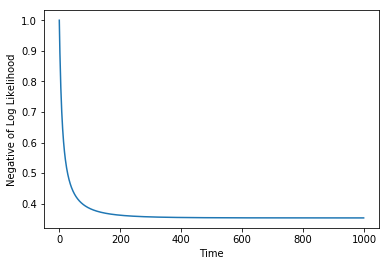

In [75]:
plt.plot(error_list)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

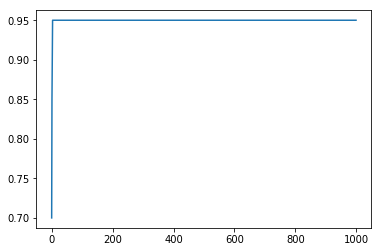

0.95


In [76]:
plt.plot(acc)
plt.show()
print(acc[-1])

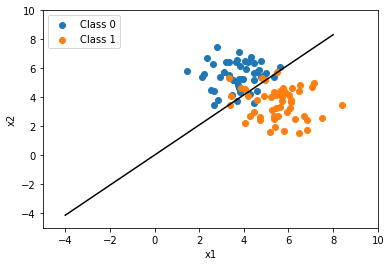

In [77]:
plt.scatter(a[:49,0],a[:49,1],label = 'Class 0')
plt.scatter(a[49:,0],a[49:,1],label = 'Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(w[0]+w[1]*x)/w[2]
plt.plot(x,y,color='k')

plt.legend()
plt.show()